In [1]:
import data_preprocessor
import pandas as pd

abbreviations = data_preprocessor.load_json("abbreviations.json")

fname_processed = 'data/khi_tickets_2022/khi_tickets_2022_unique.csv'

In [2]:
columns = ['Ticket #', 'Type', 'House #', 'Apartment #', 'Building #', 'Building Name', 'Street', 'Road', 'Area & Sub Area', 'Neighbourhood', 'City'] 
df = data_preprocessor.load_corpus(fname_processed , pandas = True, header = True)

print(len(df))

df.head() # -> address_df in normalization

71318


,Ticket#,Title,Created,Close Time,Queue,Customer User,Address
0,105207394681,HD - Fiber Disconnection,2021-12-27 18:18:20,2022-01-01 21:08:09,ODN-NN/FB/GM,ALIYA YOUSUF,"House # SC-4, Al Kareem Centre, Flat# 107, 1s..."
1,109247984771,HD - Frequent Disconnections,2022-01-01 10:05:42,2022-01-01 18:22:29,ODN-DHA,SANOBER SIDDIQ,"House # Plot# 28-C, Flat A-2, 1st Floor, Lane..."
2,101042042052,CU - Fiber Disconnection,2022-01-01 03:43:55,2022-01-01 23:26:48,HD-ADT,SAEED AFGAN,"Apartment/Suite# Flat 204, Building All Block..."
3,101087613080,HD - Abnormal CATV Optical Power,2021-12-31 21:35:36,2022-01-01 18:50:23,ODN-Lakson,DR NASEER AHMED,"Apartment/Suite# BI3, Building All Blocks, Ib..."
4,107178824611,IVR - ONT Powered Off,2021-12-31 18:18:06,2022-01-01 16:52:55,ODN-NN/FB/GM,AHMER BABER,"Apartment/Suite# 26, Building Block B, Marhab..."


In [3]:
fname = 'data/khi_tickets_2022/normalized_khi_tickets_2022_run7.csv'

normalized_df = data_preprocessor.load_corpus(fname, pandas = True, header = True)

print(len(normalized_df))

normalized_df.head()

71318


,Ticket #,Type,House #,Apartment #,Building #,Building Name,Street,Road,Area & Sub Area,Neighbourhood,City
0,105207394681,apartment,house # sc - 4,flat # 107 1st floor,NaN,al kareem centre,faizan street,NaN,block d,north nazimabad,karachi
1,109247984771,apartment,house # plot # 28 - c,flat a - 2 1st floor,NaN,NaN,lane 9,khayaban e sehar,phase 6,defence,karachi
2,101042042052,apartment,NaN,apartment / suite # flat 204,building all blocks,pardesi green land apartments,8th street,NaN,bath island,clifton,karachi
3,101087613080,apartment,NaN,apartment / suite # bi3,building all blocks,ibrahim terrace,NaN,adam road,civil lines,clifton,karachi
4,107178824611,apartment,NaN,apartment / suite # 26,building block b,marhaba galaxy,NaN,akhtar masood road,block m,north nazimabad,karachi


In [34]:
# building_df = df.drop(columns = ['Type', 'House #', 'Apartment #', 'Building #', 'Street', 'Road', 'Area & Sub Area', 'Neighbourhood', 'City'], axis=1) 

# building_only_df = building_df.dropna(subset=['Building Name'])

# list_of_buildings = building_only_df['Building Name'].tolist()

# print(list_of_buildings)

# building_df.head()

# building_only_df.head()

In [ ]:
' Apartment/Suite# House /Suite # 802, Building Block 8th floor, Badar Street, Block-16-A, Gulistan-e-Johar, Karachi '

' House # LS-9 App 2, Street 10, Block-2, Gulistan-e-Johar, Karachi '

' House # 14 C Flat 5 3rd Floor 8th, Ittehad Lane, Phase 6, Defence, Karachi '

'  House #  4C 4th Fl 10th Str, Jami Commercial, Phase 7, Defence, Karachi '

' House # 6-C/2 Flat 1 11th , Jami Commercial, Phase 7, Defence, Karachi '

' House # 94-C Flat No 5 3rd Floor  11th, Jami Commercial, Phase 7, Defence, Karachi '

' House # C 5 C Flat no.1 Main, Sehar Commercial, Phase 7, Defence, Karachi '

' House # 34-C Flat No 2 1st Floor 6th, Ittehad Lane, Phase 6, Defence, Karachi '

' House # 31/E Flat B2 2nd Floor 7A, Badar Commercial, Phase 5, Defence, Karachi '

' House # 41/Y-2, Flat# 04, 1st Floor, Dr Mahmud Hussain Rd, Block 6, PECHS, Karachi '

' House # 43/10 -L Building 3 2nd Floor, Shah Abdul Latif Rd, Block 6, PECHS, Karachi '

' House # 43-10-L/13 Flat 1, Dr Mahmud Hussain Rd, Block 6, PECHS, Karachi '

' House # 171-E  FLAT # 302, Sir Syed Road, Block 3, PECHS, Karachi '

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import data_preprocessor

def analyze_neighbourhood(df):
    scenarios = {
        "house_no_empty": (df['Type'] == 'house') & df['House #'].isna(),
        "apartment_no_empty": (df['Type'] == 'apartment') & df['Apartment #'].isna(),
        "building_name_empty": (df['Type'] == 'apartment') & df['Building Name'].isna(),
    }

    for scenario, condition in scenarios.items():
        print(f"\nCounts for scenario '{scenario}':")
        counts = df.loc[condition, 'Neighbourhood'].value_counts()
        print(counts)
        
        # Plotting
        counts.plot(kind='bar', figsize=(10, 5))
        plt.title(f"Counts for scenario '{scenario}'")
        plt.ylabel('Count')
        plt.show()


Counts for scenario 'house_no_empty':
Neighbourhood
defence                             1164
pechs                                451
clifton                              150
gulistan - e - johar                 149
gulshan - e - iqbal                  141
north nazimabad                      134
federal b area                        52
korangi                               40
north karachi                         40
gulzar - e - hijri - scheme - 33      23
saddar                                16
nazimabad                             11
gulshan - e - jamal                    5
garden                                 4
mt khan road                           3
saadi town                             3
Name: count, dtype: int64


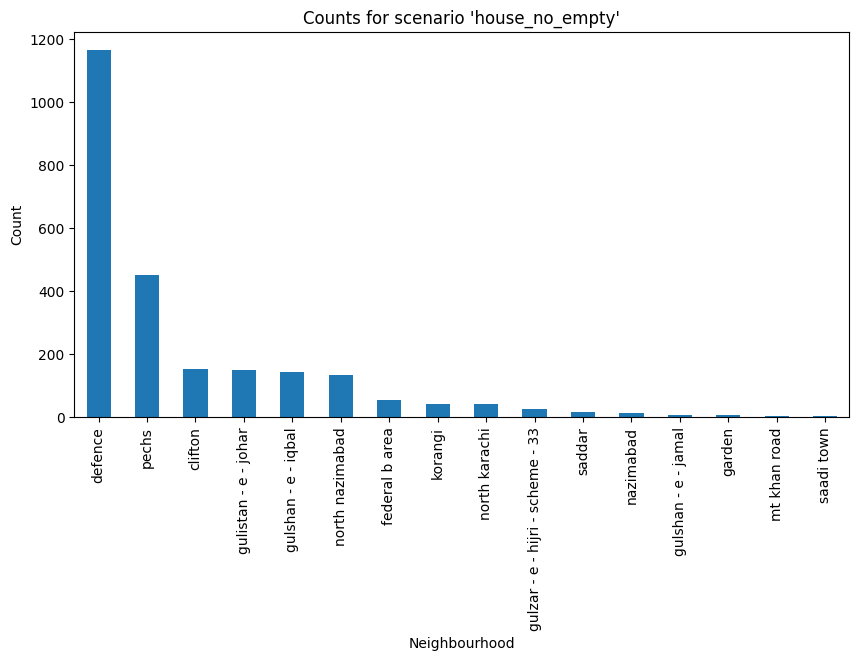


Counts for scenario 'apartment_no_empty':
Neighbourhood
defence                             641
clifton                              64
gulshan - e - iqbal                  62
pechs                                58
north karachi                        24
north nazimabad                      21
federal b area                       21
saddar                               15
nazimabad                             7
gulistan - e - johar                  4
garden                                3
mt khan road                          3
gulzar - e - hijri - scheme - 33      3
korangi                               1
saadi town                            1
Name: count, dtype: int64


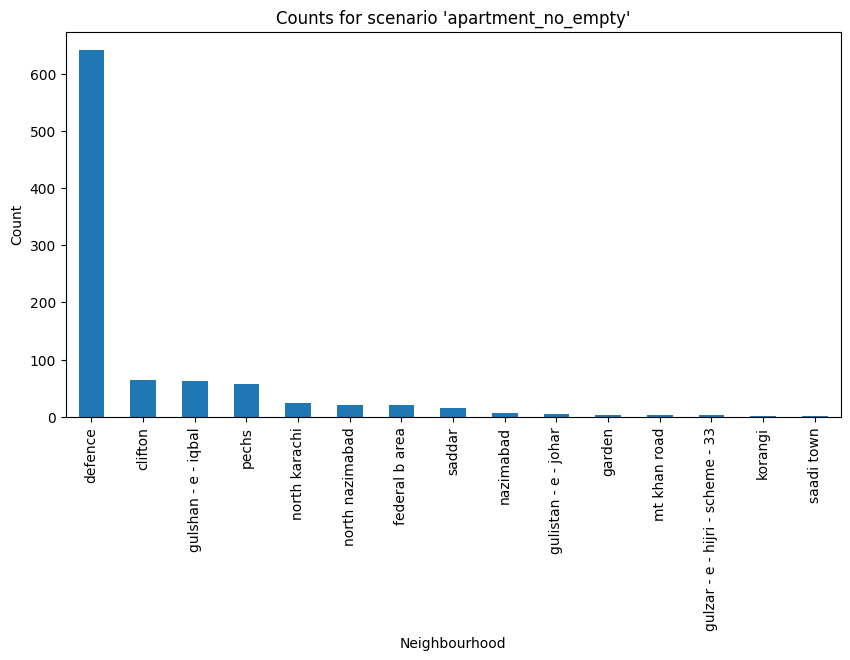


Counts for scenario 'building_name_empty':
Neighbourhood
defence                             1447
pechs                               1273
gulshan - e - iqbal                  581
clifton                              570
north nazimabad                      444
nazimabad                            148
gulistan - e - johar                 142
gulzar - e - hijri - scheme - 33     131
federal b area                       123
north karachi                         71
garden                                60
saddar                                56
mt khan road                          13
saadi town                             4
gulshan - e - jamal                    4
korangi                                1
Name: count, dtype: int64


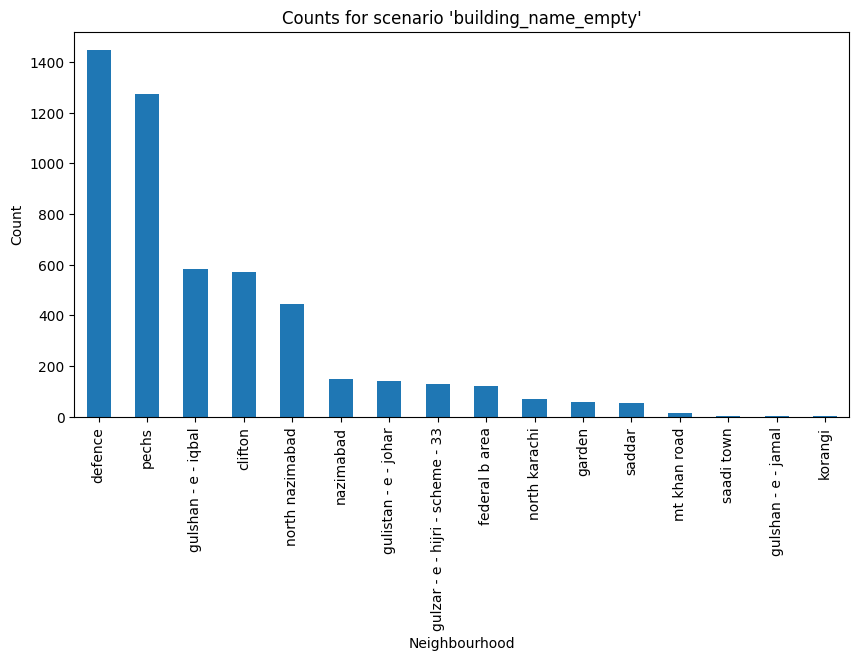

In [8]:
fname = 'data/khi_tickets_2022/normalized_khi_tickets_2022_run7.csv'

df = data_preprocessor.load_corpus(fname, pandas = True, header = True)

analyze_neighbourhood(df)


Counts for scenario 'house_no_empty':
Neighbourhood
defence                             1165
pechs                                215
clifton                              150
gulshan - e - iqbal                  117
north nazimabad                       81
gulistan - e - johar                  79
federal b area                        40
north karachi                         38
gulzar - e - hijri - scheme - 33      20
saddar                                15
korangi                               13
nazimabad                              7
garden                                 2
mt khan road                           2
gulshan - e - jamal                    1
saadi town                             1
Name: count, dtype: int64


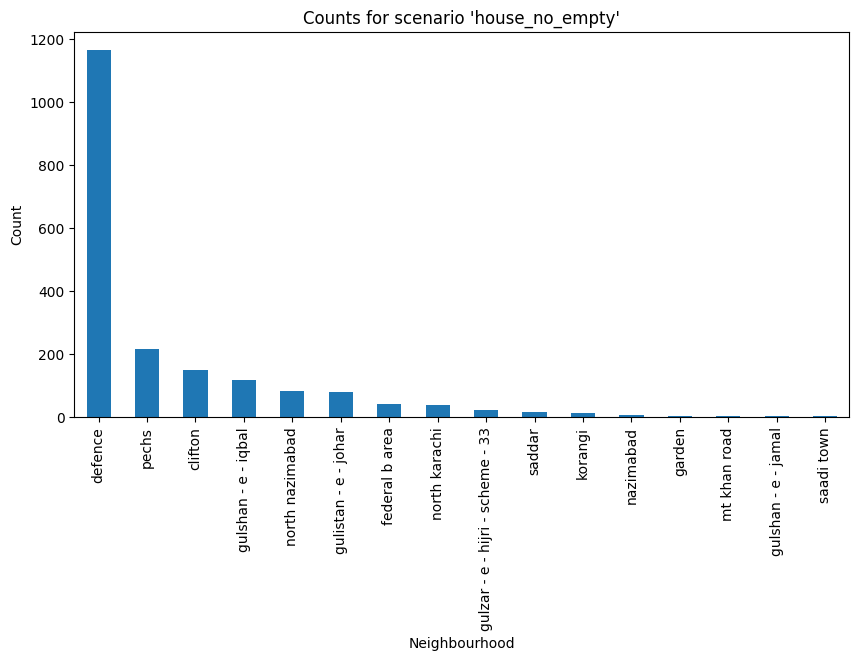


Counts for scenario 'apartment_no_empty':
Neighbourhood
defence                             641
clifton                              64
gulshan - e - iqbal                  62
pechs                                58
north karachi                        24
north nazimabad                      21
federal b area                       21
saddar                               15
nazimabad                             7
gulistan - e - johar                  4
garden                                3
mt khan road                          3
gulzar - e - hijri - scheme - 33      3
korangi                               1
saadi town                            1
Name: count, dtype: int64


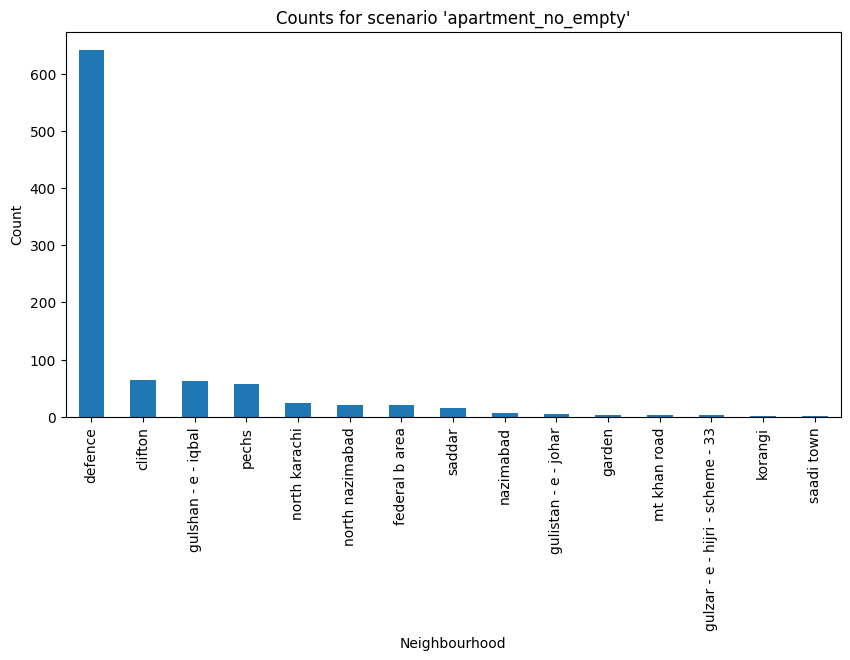


Counts for scenario 'building_name_empty':
Neighbourhood
defence                             1448
pechs                               1307
gulshan - e - iqbal                  581
clifton                              570
north nazimabad                      444
nazimabad                            148
gulistan - e - johar                 142
gulzar - e - hijri - scheme - 33     131
federal b area                       123
north karachi                         71
garden                                60
saddar                                56
mt khan road                          13
saadi town                             4
gulshan - e - jamal                    4
korangi                                1
Name: count, dtype: int64


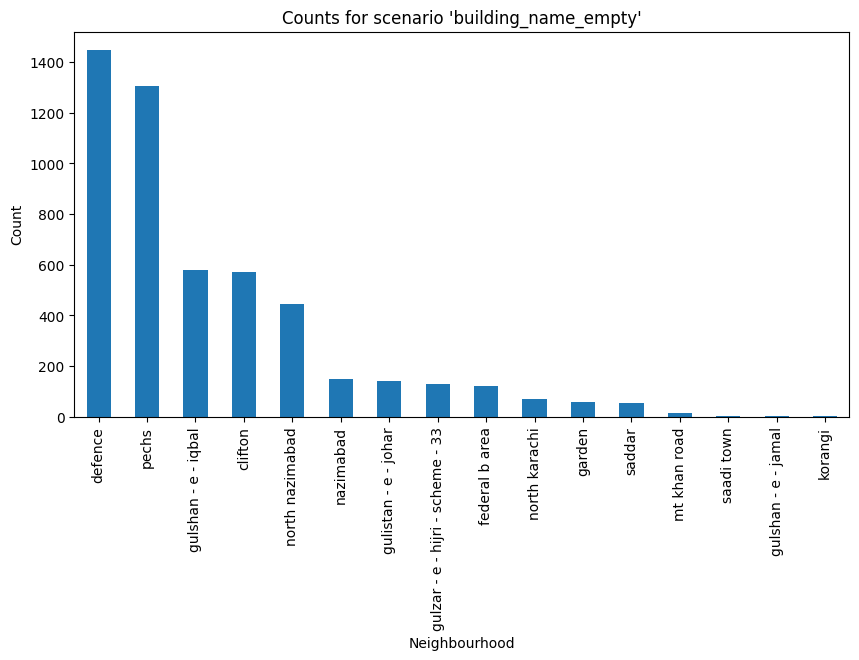

In [10]:
fname = 'data/khi_tickets_2022/normalized_khi_tickets_2022_run8.csv'

df = data_preprocessor.load_corpus(fname, pandas = True, header = True)

analyze_neighbourhood(df)